# AOSC650 Final Project

**Question:** "Can surface downwelling longwave radiation be skillfully predicted using fields of atmospheric variables and a neural network?"

In this notebook, I gather and explore my data, train and test a model, and perform tests to determine its skill. I'm focused on five input features that impact cloud radiative properties: cloud cover, temperature, cloud liquid water content, cloud ice water content, and specific humidity. First, I import my libraries.

In [1]:
# Import packages
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime as dt
import glob
import cartopy as ccrs
import matplotlib.pyplot as plt
from datetime import timedelta

### Get the data
Since I have access to ERA5 data through NCAR, I use the following code to grab and store modified data files in my directory. I am interested in the Barents and Kara Seas within the Arctic, so I slice the files into my desired region for January and February (Arctic winter) 2023 and 2024. I also split the files into hourly components. This code is repeated for my five variables. All variables are collected at 925mb, and all are instantaneous values. 

**Reference for ERA5:** Hersbach, H., Bell, B., Berrisford, P., Hirahara, S., Horányi, A., Muñoz‐Sabater, J., Nicolas, J., Peubey, C., Radu, R., Schepers, D., Simmons, A., Soci, C., Abdalla, S., Abellan, X., Balsamo, G., Bechtold, P., Biavati, G., Bidlot, J., Bonavita, M., … Thépaut, J. (2020). The ERA5 global reanalysis. Quarterly Journal of the Royal Meteorological Society, 146(730), 1999–2049. https://doi.org/10.1002/qj.3803 

In [2]:
# Slice ERA5 data so it comes only from the Arctic
# Save hourly data to scratch directory
# Repeat for each file of interest
# Commented out so it does not run again
'''
for i in sorted(glob.glob("/glade/campaign/collections/rda/data/d633000/e5.oper.an.pl/202402/e5.oper.an.pl.128_130_t.*.nc")):
    ds = xr.open_dataset(i)
    ds = ds.sel(latitude=slice(80, 70), longitude=slice(10, 80)).sel(level=925.)
    time_helper = pd.to_datetime(ds['T'].time).strftime('%Y%m%d%H')
    for j, t in enumerate(time_helper):
        ds.isel(time=j).to_netcdf(f'/glade/derecho/scratch/vgorden/AOSC650/T_region/t_{t}.nc')
'''

'\nfor i in sorted(glob.glob("/glade/campaign/collections/rda/data/d633000/e5.oper.an.pl/202402/e5.oper.an.pl.128_130_t.*.nc")):\n    ds = xr.open_dataset(i)\n    ds = ds.sel(latitude=slice(80, 70), longitude=slice(10, 80)).sel(level=925.)\n    time_helper = pd.to_datetime(ds[\'T\'].time).strftime(\'%Y%m%d%H\')\n    for j, t in enumerate(time_helper):\n        ds.isel(time=j).to_netcdf(f\'/glade/derecho/scratch/vgorden/AOSC650/T_region/t_{t}.nc\')\n'

My label is downwelling longwave radiation (DLR). Since this variable is stored in forecast time, the data needs to be transformed into standard time so that it matches the input features. The next few cells show this process for each file needed to complete a full profile of DLR for 2023 and 2024.

In [3]:
# Open dataset
# Made with Dr. Maria Molina's support
ds = xr.open_dataset("/glade/campaign/collections/rda/data/d633000/e5.oper.fc.sfc.meanflux/202301/e5.oper.fc.sfc.meanflux.235_036_msdwlwrf.ll025sc.2023010106_2023011606.nc")

datetime_array = []

for dttm in pd.to_datetime(ds.coords["forecast_initial_time"]):

    for j in ds.coords["forecast_hour"].values:

        datetime_array.append(dttm + timedelta(hours=j.astype(float)))


newds = ds.stack(time=["forecast_initial_time","forecast_hour"])["MSDWLWRF"]
# Save new values as a data array
ds = xr.DataArray(
    newds.values,
    dims=("latitude", "longitude", "time"),
    coords={
        "latitude": newds.latitude.values,
        "longitude": newds.longitude.values,
        "time": datetime_array,
    },
)
# Slice data for my region of interest
ds = ds.sel(latitude=slice(80, 70), longitude=slice(10, 80))

In [4]:
# Open dataset
# Made with Dr. Maria Molina's support
ds1 = xr.open_dataset("/glade/campaign/collections/rda/data/d633000/e5.oper.fc.sfc.meanflux/202301/e5.oper.fc.sfc.meanflux.235_036_msdwlwrf.ll025sc.2023011606_2023020106.nc")

datetime_array1 = []

for dttm in pd.to_datetime(ds1.coords["forecast_initial_time"]):

    for k in ds1.coords["forecast_hour"].values:

        datetime_array1.append(dttm + timedelta(hours=k.astype(float)))


newds1 = ds1.stack(time=["forecast_initial_time","forecast_hour"])["MSDWLWRF"]
# Save new values as a data array
ds1 = xr.DataArray(
    newds1.values,
    dims=("latitude", "longitude", "time"),
    coords={
        "latitude": newds1.latitude.values,
        "longitude": newds1.longitude.values,
        "time": datetime_array1,
    },
)
# Slice data for my region of interest
ds1 = ds1.sel(latitude=slice(80, 70), longitude=slice(10, 80))

In [5]:
# Open dataset
# Made with Dr. Maria Molina's support
ds2 = xr.open_dataset("/glade/campaign/collections/rda/data/d633000/e5.oper.fc.sfc.meanflux/202302/e5.oper.fc.sfc.meanflux.235_036_msdwlwrf.ll025sc.2023020106_2023021606.nc")

datetime_array2 = []

for dttm in pd.to_datetime(ds2.coords["forecast_initial_time"]):

    for n in ds2.coords["forecast_hour"].values:

        datetime_array2.append(dttm + timedelta(hours=n.astype(float)))


newds2 = ds2.stack(time=["forecast_initial_time","forecast_hour"])["MSDWLWRF"]
# Save new values as a data array
ds2 = xr.DataArray(
    newds2.values,
    dims=("latitude", "longitude", "time"),
    coords={
        "latitude": newds2.latitude.values,
        "longitude": newds2.longitude.values,
        "time": datetime_array2,
    },
)
# Slice data for my region of interest
ds2 = ds2.sel(latitude=slice(80, 70), longitude=slice(10, 80))

In [6]:
# Open dataset
# Made with Dr. Maria Molina's support
ds3 = xr.open_dataset("/glade/campaign/collections/rda/data/d633000/e5.oper.fc.sfc.meanflux/202302/e5.oper.fc.sfc.meanflux.235_036_msdwlwrf.ll025sc.2023021606_2023030106.nc")

datetime_array3 = []

for dttm in pd.to_datetime(ds3.coords["forecast_initial_time"]):

    for m in ds3.coords["forecast_hour"].values:

        datetime_array3.append(dttm + timedelta(hours=m.astype(float)))


newds3 = ds3.stack(time=["forecast_initial_time","forecast_hour"])["MSDWLWRF"]
# Save new values as a data array
ds3 = xr.DataArray(
    newds3.values,
    dims=("latitude", "longitude", "time"),
    coords={
        "latitude": newds3.latitude.values,
        "longitude": newds3.longitude.values,
        "time": datetime_array3,
    },
)
# Slice data for my region of interest
ds3 = ds3.sel(latitude=slice(80, 70), longitude=slice(10, 80))

In [7]:
# Combine new data arrays into one array with all times
dlr23 = xr.combine_nested([ds, ds1, ds2, ds3], concat_dim='time')

In [8]:
# Save to file for later use
dlr23.to_netcdf("DLR23_new.nc")

In [9]:
# Open dataset
# Made with Dr. Maria Molina's support
ds4 = xr.open_dataset("/glade/campaign/collections/rda/data/d633000/e5.oper.fc.sfc.meanflux/202401/e5.oper.fc.sfc.meanflux.235_036_msdwlwrf.ll025sc.2024010106_2024011606.nc")

datetime_array4 = []

for dttm in pd.to_datetime(ds4.coords["forecast_initial_time"]):

    for q in ds4.coords["forecast_hour"].values:

        datetime_array4.append(dttm + timedelta(hours=q.astype(float)))


newds4 = ds4.stack(time=["forecast_initial_time","forecast_hour"])["MSDWLWRF"]
# Save new values as a data array
ds4 = xr.DataArray(
    newds4.values,
    dims=("latitude", "longitude", "time"),
    coords={
        "latitude": newds4.latitude.values,
        "longitude": newds4.longitude.values,
        "time": datetime_array4,
    },
)
# Slice data for my region of interest
ds4 = ds4.sel(latitude=slice(80, 70), longitude=slice(10, 80))

In [10]:
# Open dataset
# Made with Dr. Maria Molina's support
ds5 = xr.open_dataset("/glade/campaign/collections/rda/data/d633000/e5.oper.fc.sfc.meanflux/202401/e5.oper.fc.sfc.meanflux.235_036_msdwlwrf.ll025sc.2024011606_2024020106.nc")

datetime_array5 = []

for dttm in pd.to_datetime(ds5.coords["forecast_initial_time"]):

    for t in ds5.coords["forecast_hour"].values:

        datetime_array5.append(dttm + timedelta(hours=t.astype(float)))


newds5 = ds5.stack(time=["forecast_initial_time","forecast_hour"])["MSDWLWRF"]
# Save new values as a data array
ds5 = xr.DataArray(
    newds5.values,
    dims=("latitude", "longitude", "time"),
    coords={
        "latitude": newds5.latitude.values,
        "longitude": newds5.longitude.values,
        "time": datetime_array5,
    },
)
# Slice data for my region of interest
ds5 = ds5.sel(latitude=slice(80, 70), longitude=slice(10, 80))

In [11]:
# Open dataset
# Made with Dr. Maria Molina's support
ds6 = xr.open_dataset("/glade/campaign/collections/rda/data/d633000/e5.oper.fc.sfc.meanflux/202402/e5.oper.fc.sfc.meanflux.235_036_msdwlwrf.ll025sc.2024020106_2024021606.nc")

datetime_array6 = []

for dttm in pd.to_datetime(ds6.coords["forecast_initial_time"]):

    for s in ds6.coords["forecast_hour"].values:

        datetime_array6.append(dttm + timedelta(hours=s.astype(float)))


newds6 = ds6.stack(time=["forecast_initial_time","forecast_hour"])["MSDWLWRF"]
# Save new values as a data array
ds6 = xr.DataArray(
    newds6.values,
    dims=("latitude", "longitude", "time"),
    coords={
        "latitude": newds6.latitude.values,
        "longitude": newds6.longitude.values,
        "time": datetime_array6,
    },
)
# Slice data for my region of interest
ds6 = ds6.sel(latitude=slice(80, 70), longitude=slice(10, 80))

In [12]:
# Open dataset
# Made with Dr. Maria Molina's support
ds7 = xr.open_dataset("/glade/campaign/collections/rda/data/d633000/e5.oper.fc.sfc.meanflux/202402/e5.oper.fc.sfc.meanflux.235_036_msdwlwrf.ll025sc.2024021606_2024030106.nc")

datetime_array7 = []

for dttm in pd.to_datetime(ds7.coords["forecast_initial_time"]):

    for p in ds7.coords["forecast_hour"].values:

        datetime_array7.append(dttm + timedelta(hours=p.astype(float)))


newds7 = ds7.stack(time=["forecast_initial_time","forecast_hour"])["MSDWLWRF"]
# Save new values as a data array
ds7 = xr.DataArray(
    newds7.values,
    dims=("latitude", "longitude", "time"),
    coords={
        "latitude": newds7.latitude.values,
        "longitude": newds7.longitude.values,
        "time": datetime_array7,
    },
)
# Slice data for my region of interest
ds7 = ds7.sel(latitude=slice(80, 70), longitude=slice(10, 80))

In [13]:
# Combine new data arrays into one array with all times
dlr24 = xr.combine_nested([ds4, ds5, ds6, ds7], concat_dim='time')

In [14]:
# Save to file for later use
dlr24.to_netcdf("DLR24_new.nc")

### Data Exploration
Now I can explore my input features. After importing them, I'll see what they look like and run a few tests to determine their importance.

In [15]:
# Grab data from respective directory
# Save it for each year and variable

cc_2023 = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CC_region/cc_2023*.nc'))
cc_2024 = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CC_region/cc_2024*.nc'))

t_2023 = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/T_region/t_2023*.nc'))
t_2024 = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/T_region/t_2024*.nc'))

clwc_2023 = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CLWC_region/clwc_2023*.nc'))
clwc_2024 = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CLWC_region/clwc_2024*.nc'))

ciwc_2023 = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CIWC_region/ciwc_2023*.nc'))
ciwc_2024 = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CIWC_region/ciwc_2024*.nc'))

q_2023 = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/Q_region/q_2023*.nc'))
q_2024 = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/Q_region/q_2024*.nc'))

In [16]:
# Open the files and save as a dataarray
# Use the time dimension to organize the data
# Drop the utc date since it's not needed

cc23 = xr.open_mfdataset(cc_2023, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
cc24 = xr.open_mfdataset(cc_2024, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

t23 = xr.open_mfdataset(t_2023, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
t24 = xr.open_mfdataset(t_2024, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

clwc23 = xr.open_mfdataset(clwc_2023, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
clwc24 = xr.open_mfdataset(clwc_2024, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

ciwc23 = xr.open_mfdataset(ciwc_2023, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
ciwc24 = xr.open_mfdataset(ciwc_2024, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

q23 = xr.open_mfdataset(q_2023, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
q24 = xr.open_mfdataset(q_2024, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

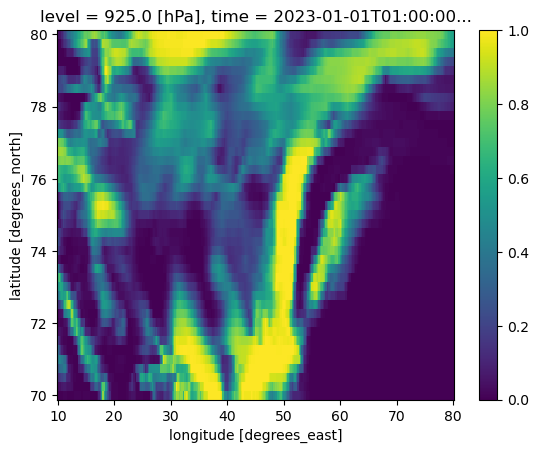

In [17]:
# Plot one hour to see what the data looks like
cc23[0,1].plot()

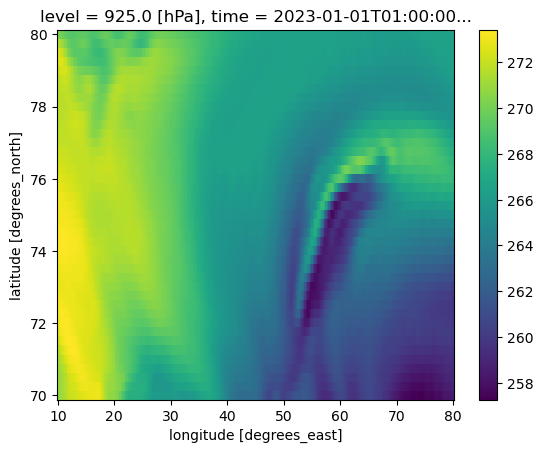

In [18]:
# Plot one hour to see what the data looks like
t23[0,1].plot()

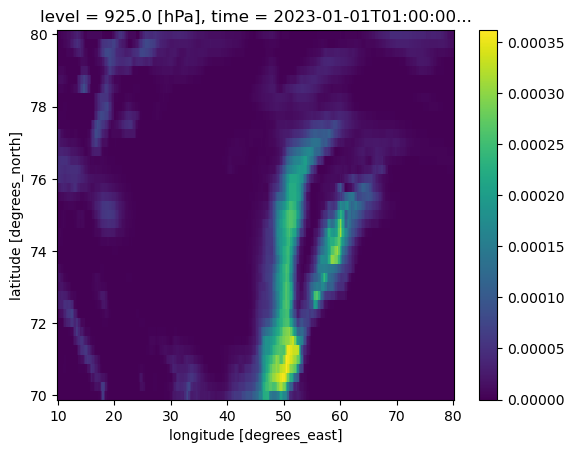

In [19]:
# Plot one hour to see what the data looks like
clwc23[0,1].plot()

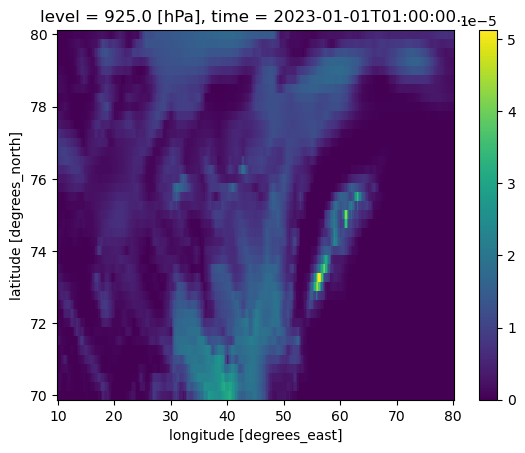

In [20]:
# Plot one hour to see what the data looks like
ciwc23[0,1].plot()

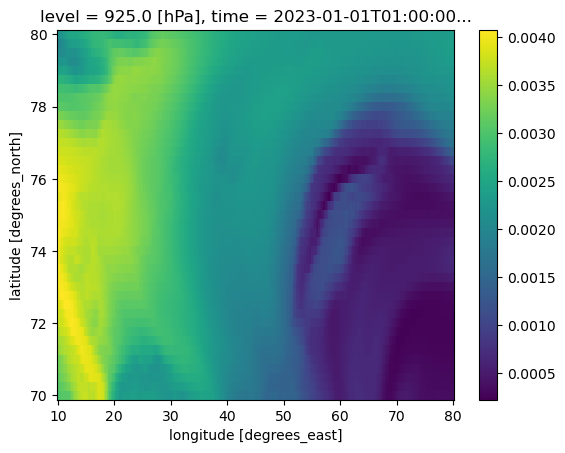

In [21]:
# Plot one hour to see what the data looks like
q23[0,1].plot()

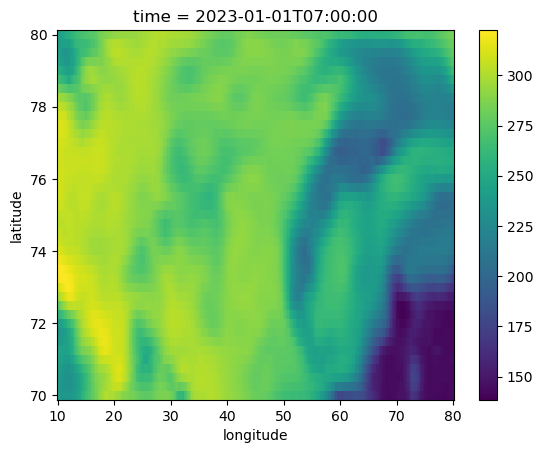

In [22]:
# Plot one hour to see what the data looks like
# Downwelling longwave radiation
ds[:,:,0].plot()

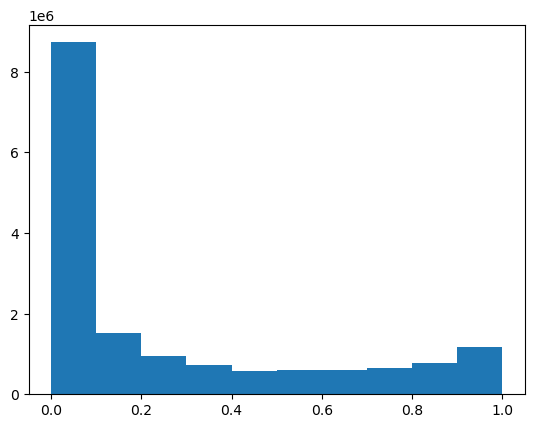

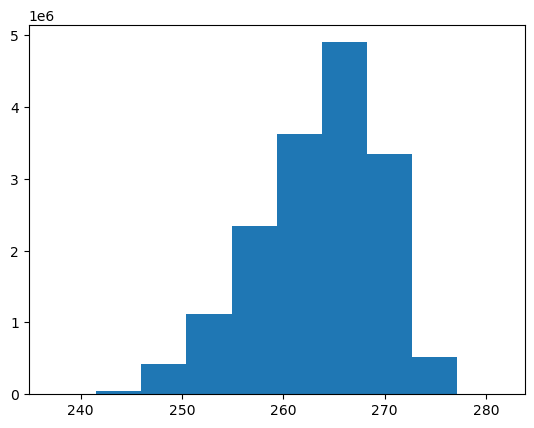

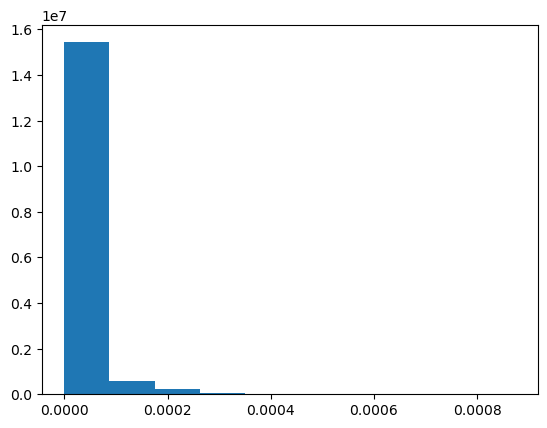

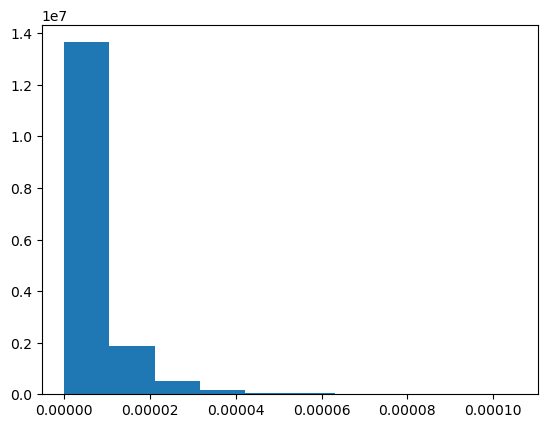

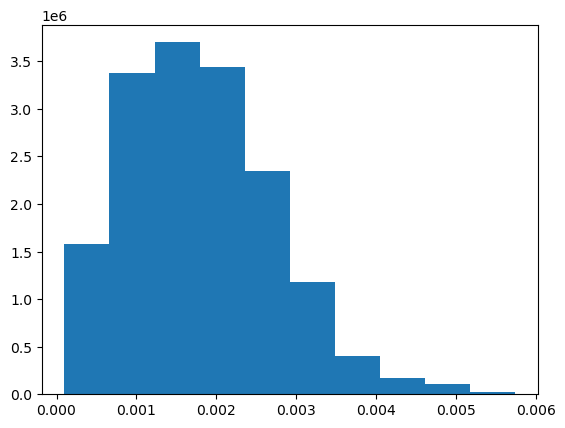

In [23]:
# Make histograms to see distribution of data
plt.hist(cc23.values.flatten()); plt.show()
plt.hist(t23.values.flatten()); plt.show()
plt.hist(clwc23.values.flatten()); plt.show()
plt.hist(ciwc23.values.flatten()); plt.show()
plt.hist(q23.values.flatten()); plt.show()

The following code is adapted from:

https://docs.xarray.dev/en/latest/examples/area_weighted_temperature.html

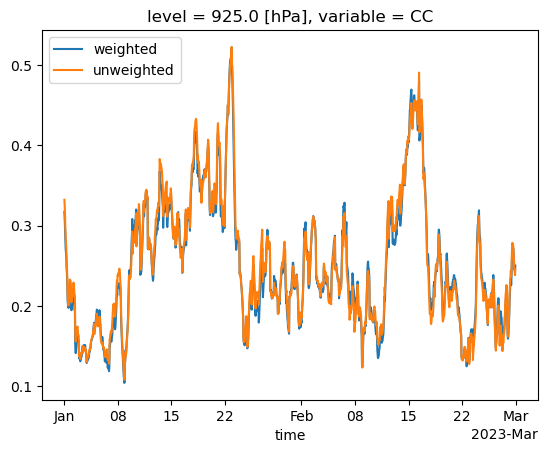

In [24]:
# Let's take a look at the average and weighted averages of a variable
# This will tell us more about the variations in a variable over my region
# Focusing on 2023 and 2024 cloud cover

# Create weighted latitudes to account for spacing at the poles
weights = np.cos(np.deg2rad(cc23.latitude))
weights.name = "weights"

# Run a weighted mean
cc_weighted23 = cc23.weighted(weights)
weighted_mean23 = cc_weighted23.mean(dim=['longitude','latitude'])

# Plot
weighted_mean23.plot(label='weighted')
cc23.mean(dim=['longitude','latitude']).plot(label="unweighted")

plt.legend()

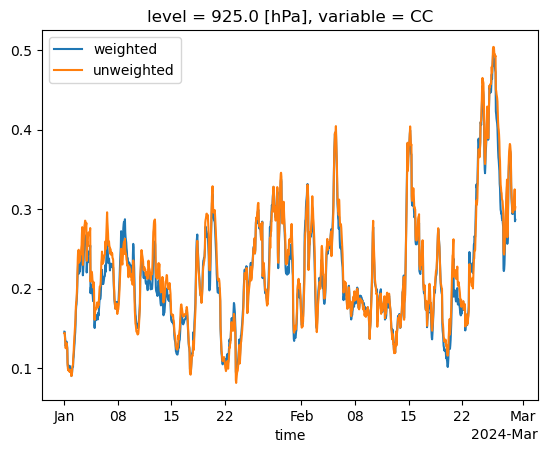

In [25]:
# Do the same thing but for 2024
cc_weighted24 = cc24.weighted(weights)
weighted_mean24 = cc_weighted24.mean(dim=['longitude','latitude'])

weighted_mean24.plot(label='weighted')
cc24.mean(dim=['longitude','latitude']).plot(label="unweighted")

plt.legend()

In [26]:
# Define correlation coefficient function
# Spearman makes no assumptions about my data
from scipy.stats import spearmanr

def correlation(var1, var2):
    ds1_flatten = var1.values.flatten()
    ds2_flatten = var2.values.flatten()
    ds1_flat_norm = (ds1_flatten - np.mean(ds1_flatten)) / np.std(ds1_flatten)
    ds2_flat_norm = (ds2_flatten - np.mean(ds2_flatten)) / np.std(ds2_flatten)
    pr = spearmanr(ds1_flat_norm, ds2_flat_norm)
    return pr

In [27]:
# Run correlation tests for all variables
print(correlation(cc23, t23))
print(correlation(cc23, clwc23))
print(correlation(cc23, ciwc23))
print(correlation(cc23, q23))
print(correlation(t23, clwc23))
print(correlation(t23, ciwc23))
print(correlation(t23, q23))
print(correlation(clwc23, ciwc23))
print(correlation(clwc23, q23))
print(correlation(ciwc23, q23))

SignificanceResult(statistic=0.00586166260990064, pvalue=6.4315570664673196e-124)
SignificanceResult(statistic=0.7158900266049897, pvalue=0.0)
SignificanceResult(statistic=0.8189594554643219, pvalue=0.0)
SignificanceResult(statistic=0.19299294022899077, pvalue=0.0)
SignificanceResult(statistic=0.221855904605564, pvalue=0.0)
SignificanceResult(statistic=-0.12188328314963284, pvalue=0.0)
SignificanceResult(statistic=0.9475885115699569, pvalue=0.0)
SignificanceResult(statistic=0.545691696017209, pvalue=0.0)
SignificanceResult(statistic=0.3365424031510754, pvalue=0.0)
SignificanceResult(statistic=0.07340103838855899, pvalue=0.0)


### Transforming the Training Data

The cloud cover, cloud liquid water content, and cloud ice water content variables are all skewed toward zero, but attemping to use a log or square root transformation did not help because those variables contain a lot of zeros. Instead, I just use MinMaxScaler to restructure my data between zero and one.  

In [28]:
# Import MinMaxScaler
# Create one for each variable

from sklearn.preprocessing import MinMaxScaler
scaler_cc = MinMaxScaler()
scaler_t = MinMaxScaler()
scaler_clwc = MinMaxScaler()
scaler_ciwc = MinMaxScaler()
scaler_q = MinMaxScaler()
scaler_label = MinMaxScaler()

In [29]:
# Stack the dimsensions for the variable
cc23_da = cc23.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [30]:
# Use fit_transform to scale the data
cc23_np = cc23_da.values
cc23_final = scaler_cc.fit_transform(cc23_np.reshape(-1, 1))

In [31]:
# Stack the dimsensions for the variable
t23_da = t23.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [32]:
# Use fit_transform to scale the data
t23_np = t23_da.values
t23_final = scaler_t.fit_transform(t23_np.reshape(-1, 1))

In [33]:
# Stack the dimsensions for the variable
clwc23_da = clwc23.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [34]:
# Use fit_transform to scale the data
clwc23_np = clwc23_da.values
clwc23_final = scaler_clwc.fit_transform(clwc23_np.reshape(-1, 1))

In [35]:
# Stack the dimsensions for the variable
ciwc23_da = ciwc23.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [36]:
# Use fit_transform to scale the data
ciwc23_np = ciwc23_da.values
ciwc23_final = scaler_ciwc.fit_transform(ciwc23_np.reshape(-1, 1))

In [37]:
# Stack the dimsensions for the variable
q23_da = q23.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [38]:
# Use fit_transform to scale the data
q23_np = q23_da.values
q23_final = scaler_q.fit_transform(q23_np.reshape(-1, 1))

In [39]:
# Combine all features into one array
input_train = np.hstack([cc23_final, t23_final, clwc23_final, ciwc23_final, q23_final])

In [41]:
# Save file to use later
np.save('new_input_train.npy', input_train)

Do the same thing for but for my labels.

In [42]:
# Read in the file
dlr23 = xr.open_dataset("DLR23_new.nc").to_dataarray()

In [43]:
# Stack the dimsensions for the variable
dlr23_da = dlr23.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [44]:
# Use fit_transform to scale the data
dlr23_np = dlr23_da.values
dlr23_final = scaler_label.fit_transform(dlr23_np.reshape(-1, 1))

In [45]:
# Save for later
np.save('output_train_rescaled.npy', dlr23_final)

### Train the Model

My model parameters are based on continuous grid searching. Since my model kept overfitting, I added batch normalization and dropout. I also have a lot of data (~16 million samples), so I can afford to use smaller epochs.

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
import keras

2025-05-12 14:22:28.216567: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-12 14:22:30.262031: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
#keras.utils.set_random_seed(90)
model = Sequential() # instantiate model object, this is supervised learning
model.add(keras.Input(shape=(5,), name="input_layer")) # Five input nodes
model.add(Dense(20, kernel_regularizer='l2')) # Twenty nodes in one hidden layer
model.add(BatchNormalization()) # Helps with overfitting
model.add(Activation('relu'))
model.add(Dropout(0.5)) # Helps with overfitting
model.add(Dense(1)) # One output node (regression task)

In [48]:
model.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), # Determined through grid searching
    loss='mse'
)

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 40 (160.00 B)

In [50]:
EPOCHS=3

In [51]:
# Code taken from Dr. Molina's ANN notebook
history = model.fit(
    x=input_train,
    y=dlr23_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 91s 2ms/step - loss: 0.0768 - val_loss: 0.0113
Epoch 2/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - loss: 0.0131 - val_loss: 0.0112
Epoch 3/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - loss: 0.0131 - val_loss: 0.0112


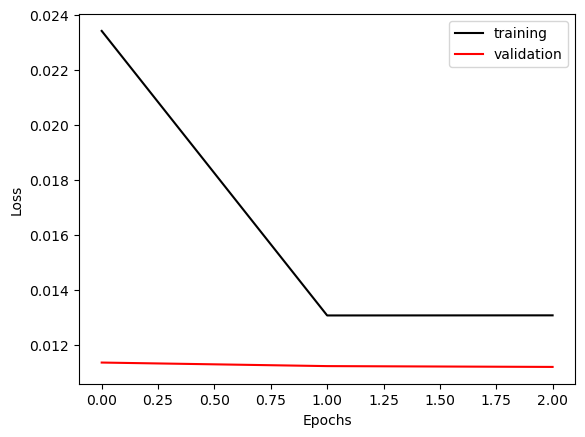

In [52]:
# Compare training and validation
plt.plot(
    range(0, 3), 
    history.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Transforming the Testing Data

Now I perform scaling for my test data. 

In [53]:
# Stack the dimsensions for the variable
cc24_da = cc24.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [54]:
# Use transform to scale the data
cc24_np = cc24_da.values
cc24_final = scaler_cc.transform(cc24_np.reshape(-1, 1))

In [55]:
# Stack the dimsensions for the variable
t24_da = t24.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [56]:
# Use transform to scale the data
t24_np = t24_da.values
t24_final = scaler_t.transform(t24_np.reshape(-1, 1))

In [57]:
# Stack the dimsensions for the variable
clwc24_da = clwc24.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [58]:
# Use transform to scale the data
clwc24_np = clwc24_da.values
clwc24_final = scaler_clwc.transform(clwc24_np.reshape(-1, 1))

In [59]:
# Stack the dimsensions for the variable
ciwc24_da = ciwc24.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [60]:
# Use transform to scale the data
ciwc24_np = ciwc24_da.values
ciwc24_final = scaler_ciwc.transform(ciwc24_np.reshape(-1, 1))

In [61]:
# Stack the dimsensions for the variable
q24_da = q24.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [62]:
# Use transform to scale the data
q24_np = q24_da.values
q24_final = scaler_q.transform(q24_np.reshape(-1, 1))

In [63]:
# Combine all features into one array
input_test = np.hstack([cc24_final, t24_final, clwc24_final, ciwc24_final, q24_final])

In [64]:
# Save for later use
np.save('new_input_test.npy', input_test)

In [65]:
# Open dataset
dlr24 = xr.open_dataset("DLR24_new.nc").to_dataarray()

The 2024 radiation data includes February 29, so I drop the last 24 hourly observations to keep this data consistent with 2023.

In [66]:
# Drop last 24 observations so length of array matches input data
dim_size = dlr24.sizes['time']
dlr24_dropped = dlr24.isel({'time': slice(0, dim_size - 24)})
dlr24_dropped.shape

(1, 41, 281, 1416)

In [67]:
# Stack dimensions
dlr24_da = dlr24_dropped.isel(variable=0).stack(tmp=['time','latitude','longitude'])

In [68]:
# Call transform
dlr24_np = dlr24_da.values
dlr24_final = scaler_label.transform(dlr24_np.reshape(-1, 1))

In [69]:
# Save for later
np.save('output_test_rescaled.npy', dlr24_final)

### Test the Model

In [70]:
# To predict, use predict call
predictions = model.predict(
    x=input_test,
)
     

509805/509805 ━━━━━━━━━━━━━━━━━━━━ 352s 688us/step


In [71]:
flat1 = dlr24_final.flatten() # Flatten these to make a line of best fit
flat2 = predictions.flatten()

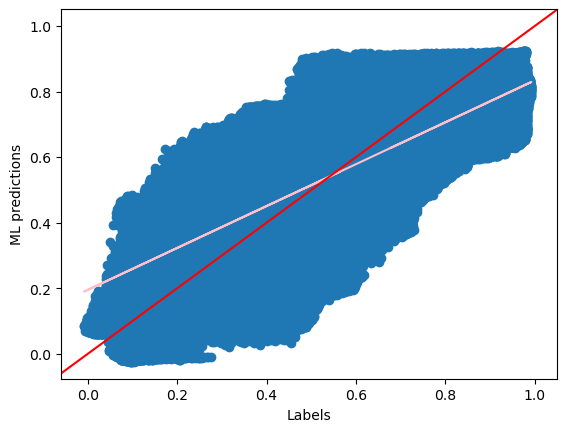

In [72]:
plt.scatter(dlr24_final, predictions) # Make a scatter plot of predictions vs actual answers
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat1, flat2, 1) # Compare this to a perfect case
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat1)
plt.plot(flat1, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r') # Perfect scenario

plt.show()

In [73]:
# Mean squared error (MSE)
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_final - predictions))

from sklearn.metrics import r2_score
# R2
r2 = r2_score(dlr24_final, predictions)

print(means); print(r2)

0.010704009
0.6392984390258789


### Model Evaluation

What did my model learn? How robust is it? First, I use SHAP to determine which features are most important to my model's predictions. While this was re-run for several different samples, temperature and specific humidity were found to be the most important features in each case.

In [74]:
import shap

/glade/work/vgorden/conda-envs/keras-tf-v2025/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [75]:
# Code taken from Dr. Molina
np.random.shuffle(input_train)
X100 = shap.utils.sample(input_train[0:1000], 100)  # 100 instances for use as the background distribution

explainer = shap.Explainer(model, X100)
shap_vals = explainer(input_test[0:1000])

ExactExplainer explainer: 1001it [00:28, 35.45it/s]                          


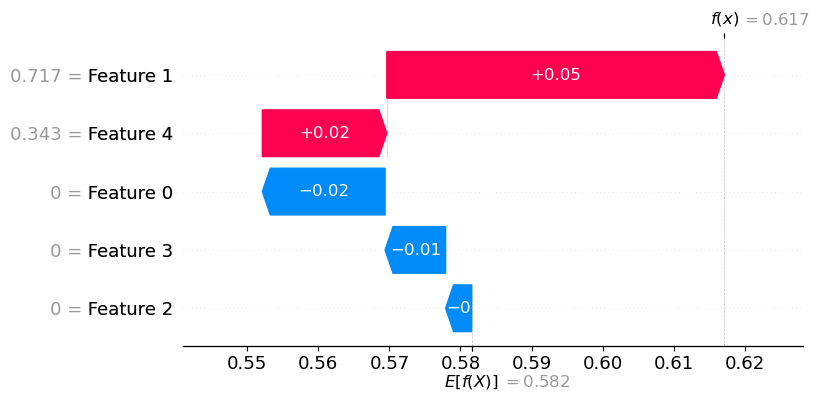

In [76]:
# Plots an explanation of a single prediction as a waterfall plot.
# The SHAP value of a feature represents the impact of the evidence provided by that feature on the model's output.
# The waterfall plot is designed to visually display how the SHAP values (evidence) of each feature
# move the model output from our prior expectation under the background data distribution, to the final model
# prediction given the evidence of all the features.
sample_ind = 14
shap.plots.waterfall(shap_vals[sample_ind], max_display=14)

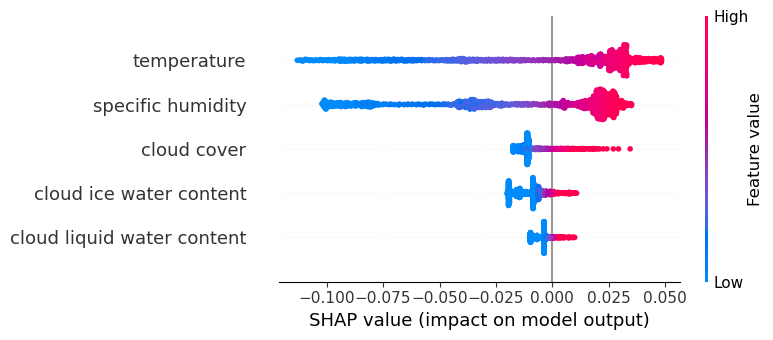

In [77]:
# Create a SHAP beeswarm plot, colored by feature values when they are provided.
shap.summary_plot(shap_vals, input_test[0:1000], feature_names=['cloud cover','temperature',
                                                           'cloud liquid water content',
                                                           'cloud ice water content',
                                                           'specific humidity'])

To determine my model's skill, I run 4 extra models, each with a different random seed, with the same dataset and compare them to my original mode. The following boxplots showcase the R2 values for each of these runs, which can be found in my complimentary notebook titled "AOSC650_HW3_ExtraModels." There is a boxplot for all of the data, then cases where I train/test January and February data separately.

In [78]:
# Save R2s into array
r2s = [[0.6218153238296509, # All run with a different random seed
0.620658278465271, # First index includes Jan and Feb data
0.6258872747421265,
0.5677218437194824,
0.6414759159088135],
         [0.6671055555343628, # Second index run only with Jan data
0.654338002204895,
0.6207098960876465,
0.6569504737854004,
0.6462475657463074],
        [0.49700331687927246, # Third index run only with Feb data
0.49896299839019775,
0.48917144536972046,
0.5298565626144409,
0.43511295318603516]]

Text(0, 0.5, 'R2 Score')

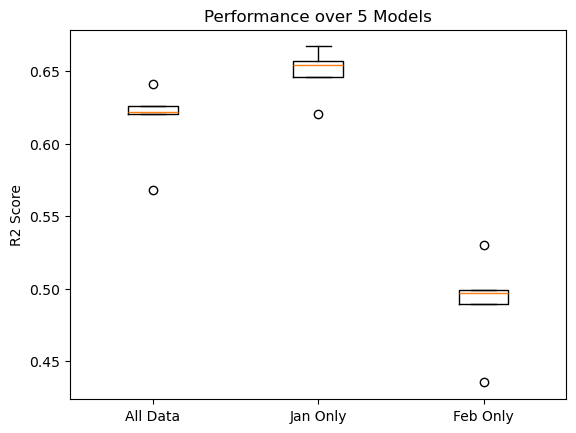

In [79]:
# Make a boxplot
plt.boxplot(r2s, tick_labels=['All Data','Jan Only','Feb Only'])
plt.title('Performance over 5 Models')
plt.ylabel('R2 Score')